

---


**<center>Pandit Deendayal Energy University**<br>
**School of Technology**<br>
**Machine Learning Lab (20CP401P)**<br>
**B.Tech-Computer Science & Engineering (Sem-VII)**<br>


Name: Mire Kishorkumar Patel<br>
Roll No.: 19BCP080<br>
Branch: Computer Science & Engineering<br>

Lab 5 Assignment<br>
Perform handwritten digit classification using logistic regression


---


# **MACHINE LEARNING LAB - 5: Perform handwritten digit classification using logistic regression**

**• PROBLEM STATEMENT : Perform handwritten digit classification using logistic regression**

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("./train.csv")
df.head()











,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Train-Test Split: split the dataset into train and test only**

In [ ]:
x = df.drop('label', axis=1).values
y = df['label'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 45)

**Data Preprocessing: using StandardScaler**

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Training: use sklearn’s implementation of logistic regression. Perform hyperparameter tuning using either of the following cross validation schemes:**

**a)	RandomSearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html**

**b)	GridSearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html**

**In these schemes, you do not have to explicitly create a cross validation set. It will be done by these functions using K-fold cross validation.**

**In logistic regression ‘C’ is a hyperparameter used for regularization**

**Here I have used GridSearchCV scheme**

In [ ]:
parameters = {'C': [0.01, 0.1, 1, 10]}

grid = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters, cv=4, verbose=2, return_train_score=True)
grid.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV] END .............................................C=0.01; total time=  14.7s
[CV] END .............................................C=0.01; total time=  14.5s
[CV] END .............................................C=0.01; total time=  14.3s
[CV] END .............................................C=0.01; total time=  14.2s
[CV] END ..............................................C=0.1; total time=  13.9s
[CV] END ..............................................C=0.1; total time=  14.3s
[CV] END ..............................................C=0.1; total time=  14.4s
[CV] END ..............................................C=0.1; total time=  14.0s
[CV] END ................................................C=1; total time=  14.2s
[CV] END ................................................C=1; total time=  13.8s
[CV] END ................................................C=1; total time=  14.2s
[CV] END ........................................

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10]}, return_train_score=True,
             verbose=2)

In [ ]:
grid.cv_results_

{'mean_fit_time': array([14.36811972, 14.1221621 , 14.0192762 , 13.91152829]),
 'std_fit_time': array([0.19526077, 0.22426028, 0.15694221, 0.12564916]),
 'mean_score_time': array([0.0238927 , 0.02198964, 0.0227862 , 0.0221104 ]),
 'std_score_time': array([0.00383885, 0.00040457, 0.00067718, 0.00037252]),
 'param_C': masked_array(data=[0.01, 0.1, 1, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}],
 'split0_test_score': array([0.91369048, 0.90639881, 0.89508929, 0.88467262]),
 'split1_test_score': array([0.92142857, 0.91279762, 0.89434524, 0.88482143]),
 'split2_test_score': array([0.9171131 , 0.90625   , 0.88616071, 0.87589286]),
 'split3_test_score': array([0.92083333, 0.91324405, 0.89300595, 0.88630952]),
 'mean_test_score': array([0.91826637, 0.90967262, 0.8921503 , 0.88292411]),
 'std_test_score': array([0.0031168 , 0.00335235, 0.00353775, 0.00410964]),
 'rank_test_sco

**Plot “hyperparameter vs. train-accuracy” and “hyperparameter vs. cv-accuracy” graphs.**

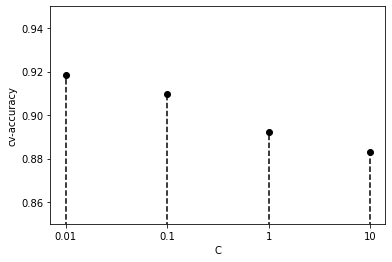

In [ ]:
C_vals = [str(x) for x in parameters['C']]

plt.xlabel("C")
plt.ylabel("cv-accuracy")
plt.scatter(C_vals, grid.cv_results_['mean_test_score'], color='black')
plt.vlines(C_vals, 0, grid.cv_results_['mean_test_score'], linestyle="dashed")
plt.ylim(0.85,.95)
plt.xticks(C_vals)
plt.show()

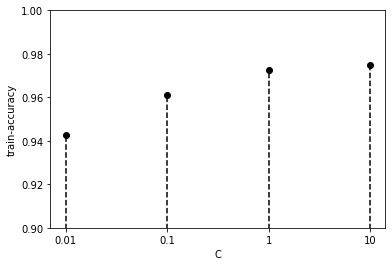

In [ ]:
plt.xlabel("C")
plt.ylabel("train-accuracy")
plt.scatter(C_vals, grid.cv_results_['mean_train_score'], color='black')
plt.vlines(C_vals, 0, grid.cv_results_['mean_train_score'], linestyle="dashed")
plt.ylim(0.9,1.00)
plt.xticks(C_vals)
plt.show()

In [ ]:
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Best parameters: {'C': 0.01}
Best score: 0.918266369047619


**Compute the accuracy on test data.**

In [ ]:
model = LogisticRegression(C=0.01)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

accuracy_score(y_test, y_pred)

0.916547619047619

In [ ]:
for c in parameters['C']:
    model = LogisticRegression(C=c)

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(c, accuracy_score(y_test, y_pred))

0.01 0.916547619047619
0.1 0.9121428571428571
1 0.9004761904761904
10 0.8961904761904762
